<a href="https://colab.research.google.com/github/carlottaviappiani/MLPNS_CViappiani/blob/main/KNNtest.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#KNN test

In [1]:
import numpy as np #per creare dati fittizi
import pylab as pl #per plottare
import scipy
from scipy.spatial.distance import cdist #per misurare distanze

In [2]:
np.random.seed(166) #riproducibilità

In [3]:
data=np.random.randn(100,2) #dataset bidimens distrib come gaussiana

In [12]:
labels=np.random.randint(0,2,100) #creo label che per semplicità sono 2, quindi per ognuno dei 100 dati ho una feature o 0 o 1
labels

array([1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 1, 0, 0,
       0, 1, 1, 0, 1, 1, 1, 0, 1, 1, 0, 1, 1, 0, 0, 0, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0, 1, 0, 1, 0,
       1, 1, 0, 0, 1, 0, 1, 1, 1, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1,
       0, 1, 1, 0, 0, 0, 1, 1, 1, 1, 1, 1])

In [13]:
data.shape

(100, 2)

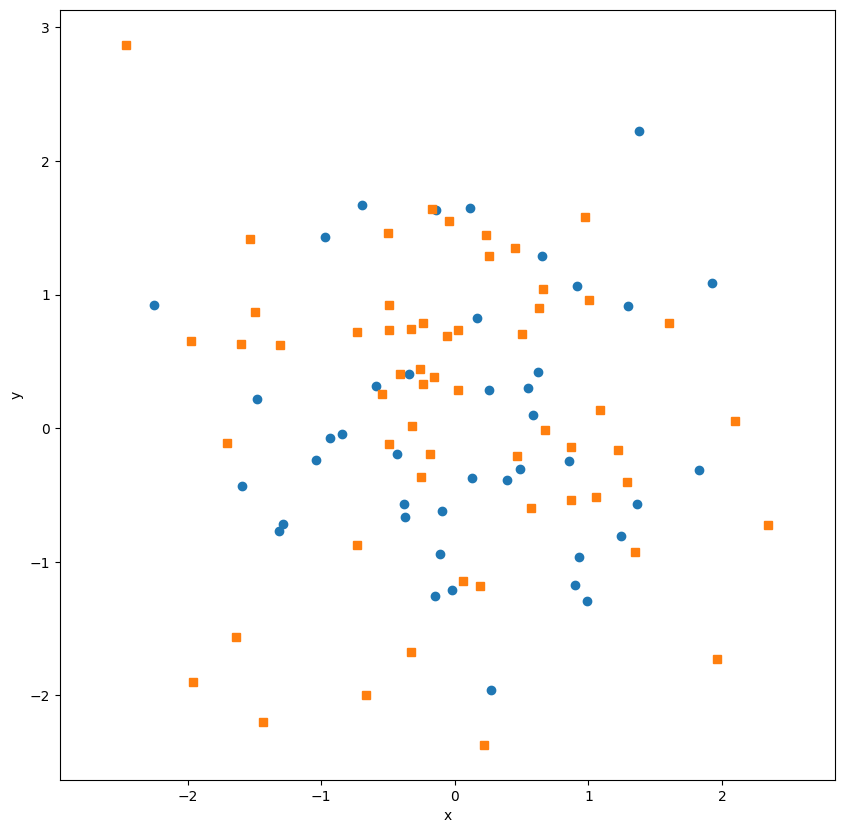

In [19]:
ax = pl.figure(figsize=(10,10)).add_subplot(1,1,1)
ax.axis('equal')

ax.plot(data[:,0][labels==0], data[:,1][labels==0], 'o')
ax.plot(data[:,0][labels==1], data[:,1][labels==1], 's')
ax.set_xlabel("x")
ax.set_ylabel("y");

In [20]:
testparticle=np.random.randn(2) #scelgo una particella casuale 
testparticle

array([ 0.99798818, -0.06973922])

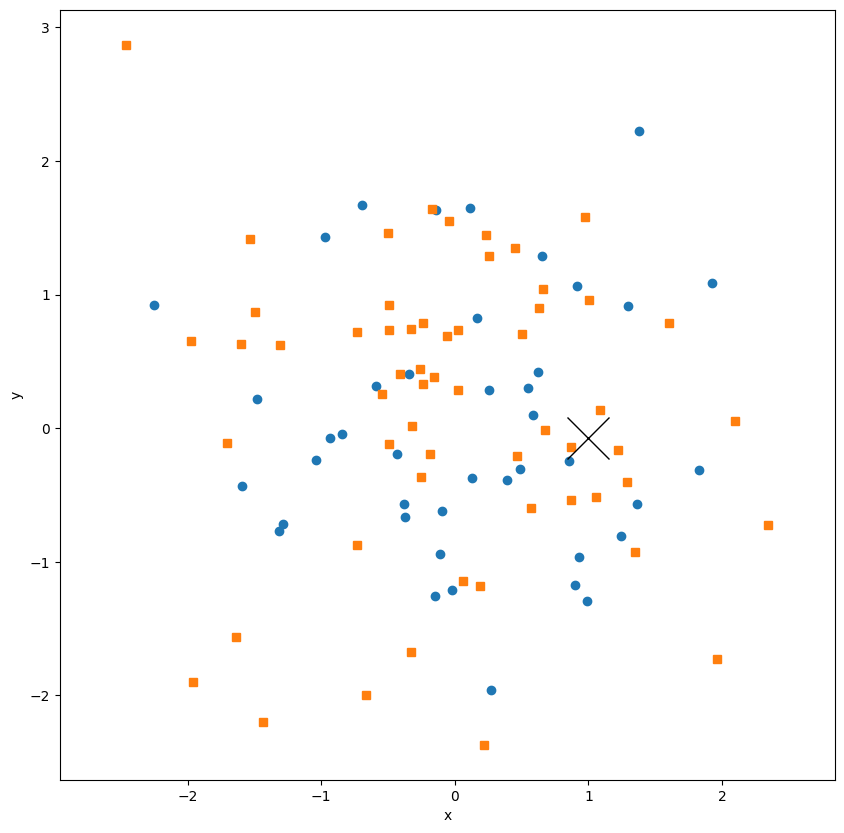

In [37]:
ax = pl.figure(figsize=(10,10)).add_subplot(1,1,1)
ax.axis('equal')

ax.plot(data[:,0][labels==0], data[:,1][labels==0], 'o')
ax.plot(data[:,0][labels==1], data[:,1][labels==1], 's')
ax.plot(testparticle[0],testparticle[1],'kx',ms=30,lw=3)
ax.set_xlabel("x")
ax.set_ylabel("y");

In [23]:
d=cdist(np.atleast_2d(testparticle),data) #calcola la distanza euclidea tra la particella e tutti gli altri punti

In [24]:
np.argmin(d) #posizione del valore più piccolo delle distanze

83

In [25]:
np.min(d), d[:,np.argmin(d)]

(0.1433155822425268, array([0.14331558]))

In [27]:
k=1
labeltest= labels[np.argmin(d)] #assegno come valore label per la testparticle 
          #cioè valore della particella più vicina ad essa: il label 
          #della mia particella lo trovo assegnando il colore della particella 
          #a distanza più vicina)

<ipython-input-36-988815f2c142>:6: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "kx" (-> color='k'). The keyword argument will take precedence.
  ax.plot(testparticle[0],testparticle[1],'kx',ms=30,lw=3,color=colors[labeltest])


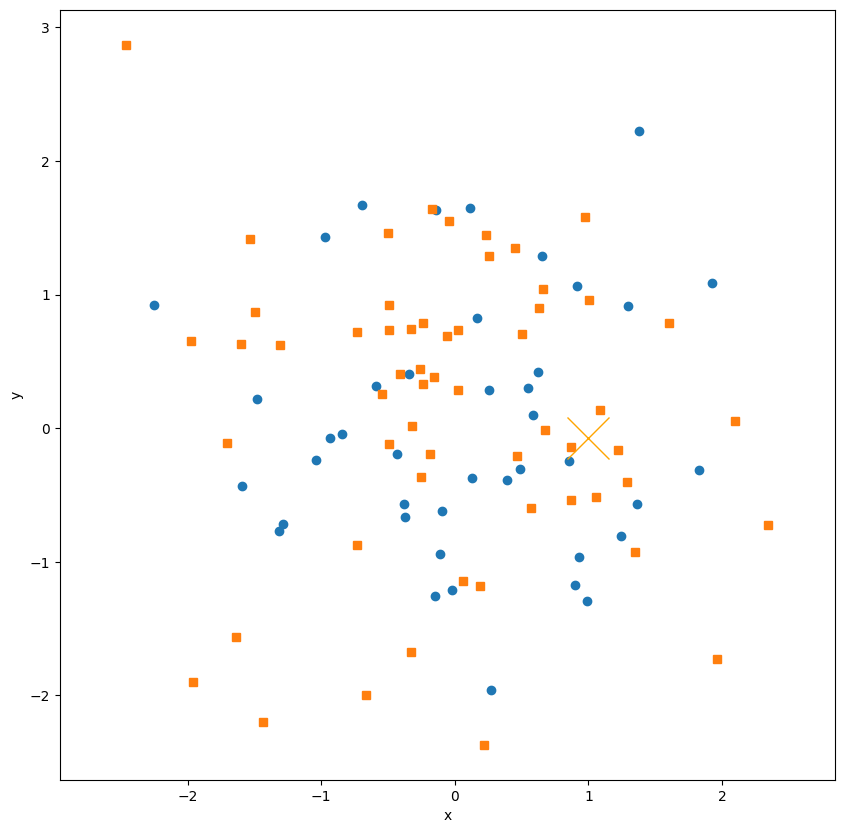

In [36]:
ax = pl.figure(figsize=(10,10)).add_subplot(1,1,1)
ax.axis('equal')
colors=['blue','orange']
ax.plot(data[:,0][labels==0], data[:,1][labels==0], 'o')
ax.plot(data[:,0][labels==1], data[:,1][labels==1], 's')
ax.plot(testparticle[0],testparticle[1],'kx',ms=30,lw=3,color=colors[labeltest])
ax.set_xlabel("x")
ax.set_ylabel("y");

In [34]:
#5 oggetti più vicini
k=5
nns=data[np.argsort(d)][0][:k]

In [31]:
nnslabel=labels[np.argsort(d)][0][:k]
nnslabel

array([1, 1, 0, 1, 1])

In [33]:
#la label più popolare è 0 quindi mi aspetto di trovare il label risultante =0
label2test=0 if (nnslabel==0).sum()>(nnslabel==1).sum() else 1

<ipython-input-38-e7121f8183ba>:6: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "kx" (-> color='k'). The keyword argument will take precedence.
  ax.plot(testparticle[0],testparticle[1],'kx',ms=30,lw=3,color=colors[labeltest])


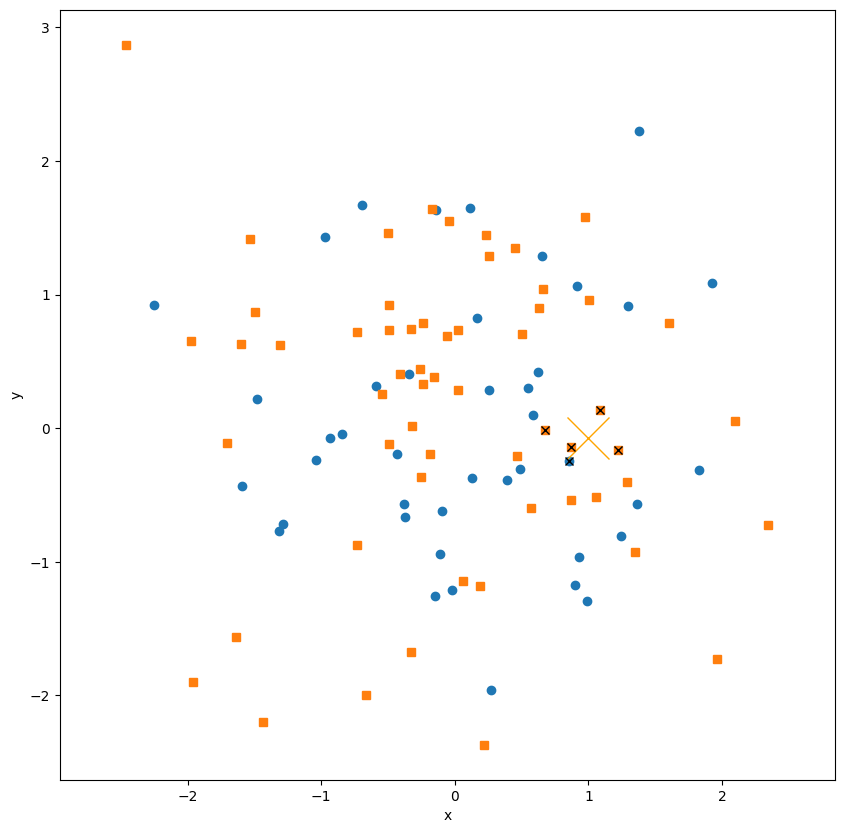

In [38]:
ax = pl.figure(figsize=(10,10)).add_subplot(1,1,1)
ax.axis('equal')
colors=['blue','orange']
ax.plot(data[:,0][labels==0], data[:,1][labels==0], 'o')
ax.plot(data[:,0][labels==1], data[:,1][labels==1], 's')
ax.plot(testparticle[0],testparticle[1],'kx',ms=30,lw=3,color=colors[labeltest])
ax.plot(nns[:,0],nns[:,1],'kx')
ax.set_xlabel("x")
ax.set_ylabel("y");